In [3]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf
from scipy.signal import find_peaks

In [4]:
bag = rosbag.Bag('/home/hakanergin/code/rosbags/static/rotation/16h5/s_yaw_16h5_2m_360_30.bag')

# create variables
target = 'yaw'
true_value = 'true_yaw'

# input values in degrees. the order matters, it will be used for binning 
input_vals = [0,15,30,45,60,75]

In [5]:
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t

    # conversion to euler
    rotation_quat = msg.transforms[0].transform.rotation
    pitch, yaw, roll = tf.transformations.euler_from_quaternion([rotation_quat.x,rotation_quat.y,rotation_quat.z,rotation_quat.w], axes='rxyz')

    # all rotations
    # rotation_euler = (np.degrees(pitch), np.degrees(yaw), np.degrees(roll))

    # create row
    row={'time': time.to_sec(), target: np.degrees(yaw)}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [6]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df = df[['relative_time', target]]
df

,relative_time,yaw
0,0.000000,30.928421
1,0.068406,29.311474
2,0.132382,32.235177
3,0.202196,35.071640
4,0.266661,39.331398
...,...,...
2576,100.886992,72.076551
2577,100.918621,72.835010
2578,100.954646,74.755273
2579,101.586924,-12.151549


<AxesSubplot:xlabel='relative_time'>

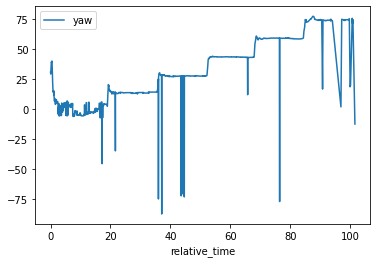

In [7]:
# initial graph
df.plot(x='relative_time', y=target)

In [8]:
# find plateaus
x = df[target]
peaks, _ = find_peaks(x, threshold=(0, 1)) # from find_peaks docs: Threshold: The first element is always interpreted as the minimal and the second, if supplied, as the maximal required threshold.

In [9]:
# the amount of data points we are left with
len(x[peaks])

504

In [10]:
# create filtered data frame
df_filtered_by_targets = df.loc[peaks]

<AxesSubplot:xlabel='relative_time', ylabel='yaw'>

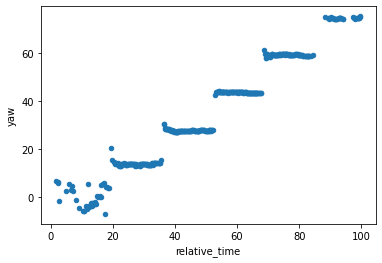

In [11]:
df_filtered_by_targets.plot.scatter(x='relative_time', y=target)

In [12]:
# segmenting/binning by real value
df_filtered_by_targets[true_value] = pd.cut(df_filtered_by_targets[target], bins=len(input_vals), labels=input_vals)

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_filtered_by_targets)

,relative_time,yaw,true_yaw
28,1.752622,6.744078,0
36,2.239708,6.143355,0
38,2.358888,6.316288,0
44,2.712747,-1.535611,0
78,4.854204,2.565700,0
94,5.902651,5.539362,0
102,6.473336,3.260850,0
110,6.960150,4.721103,0
114,7.222445,2.606615,0
128,8.161645,-1.231132,0


In [14]:
# calculate the error
df_filtered_by_targets['error'] =  df_filtered_by_targets.apply(lambda row: row[true_value] - row[target], axis=1)

In [15]:
# remove huge errors because theyre actually wrongly binned
df_filtered_by_targets = df_filtered_by_targets.drop(df_filtered_by_targets[df_filtered_by_targets['error'].abs()>10].index)

In [16]:
grouped_df = df_filtered_by_targets.groupby(true_value)

In [17]:
# verify if the bins are in correct order, this is dictated by input_vals order
grouped_df.head(2)

,relative_time,yaw,true_yaw,error
28,1.752622,6.744078,0,-6.744078
36,2.239708,6.143355,0,-6.143355
408,19.319394,20.544142,30,9.455858
422,19.786206,15.656612,15,-0.656612
434,20.317330,14.677535,15,0.322465
911,36.351593,30.284152,30,-0.284152
1398,52.784932,42.466815,45,2.533185
1413,53.318180,43.794347,45,1.205653
1872,68.720904,61.019609,60,-1.019609
1879,68.951548,59.427484,60,0.572516


In [18]:
grouped_df.error.describe()

,count,mean,std,min,25%,50%,75%,max
true_yaw,,,,,,,,
0,46.0,-0.019837,4.122188,-6.744078,-4.322004,1.383371,3.396531,6.899756
15,100.0,1.163265,0.425571,-0.656612,0.984109,1.165022,1.439633,1.968733
30,111.0,2.269259,0.823436,-0.313730,2.129969,2.266252,2.388581,9.455858
45,112.0,1.433164,0.225719,0.888214,1.284479,1.379480,1.537535,2.533185
60,97.0,0.868206,0.376899,-1.019609,0.640869,0.798676,1.004411,2.048084
75,38.0,0.573566,0.318941,-0.168592,0.392153,0.642733,0.765587,1.131484


In [19]:
def box_plotter(column_name):
    fig, axes = plt.subplots(1,len(input_vals))

    for i, val in enumerate(input_vals):
        grouped_df.get_group(val).boxplot(column=column_name, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(val)


    plt.tight_layout()
    plt.show()

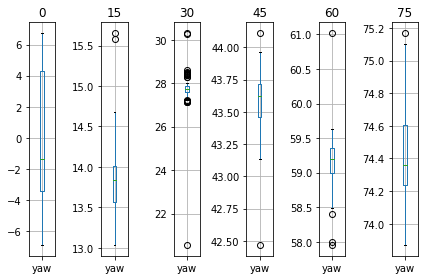

In [20]:
box_plotter(target)

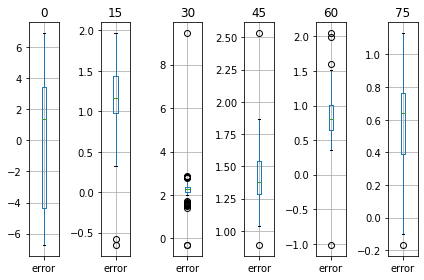

In [21]:
box_plotter('error')

In [22]:
df_filtered_by_targets.to_csv('/home/hakanergin/code/apriltag_test_bench/test_pipeline/scripts/static_tests/rotations/result/csv/2m_16h5_360.csv')